##  Data Description
Diabetes disrupts glucose regulation, either by insufficient insulin production or ineffective use of insulin,
leading to complications such as heart disease, vision loss, and kidney disease. While there's no cure,
lifestyle changes like weight loss, healthy eating, and physical activity, along with medical treatments, can
help manage the disease. Early diagnosis is crucial, allowing for proactive management and reducing longterm complications.

The Behavioral Risk Factor Surveillance System (BRFSS) is an annual health-related telephone survey conducted by the CDC, gathering data on health behaviors, chronic conditions, and preventative service usage. Diabetes Health Indicators Dataset from Kaggle will be used. Dataset have 253,680 survey responses from cleaned BRFSS 2015 + balanced dataset.

Key Attributes:
• Diabetes_012: 0 = no diabetes 1 = prediabetes 2 = diabetes;

• HighBP: High blood presure (0 = no high,BP 1 = high BP);

• HighChol: 0 = no high cholesterol 1 = high cholesterol;

• CholCheck: 0 = no cholesterol check in 5 years 1 = yes cholesterol check in 5 years;

• BMI: Body Mass Index;

• Smoker: Have you smoked at least 100 cigarettes in your entire life? 0 = no 1 = yes;

• Stroke: (Ever told) you had a stroke. (0,1);

• HeartDiseaseorAttack: coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes;

• PhysActivity: physical activity in past 30 days - not including job 0 = no 1 = yes;

• Fruits : Consume Fruit 1 or more times per day (0,1);

• Veggies : Consume Vegetables 1 or more times per day (0,1);

• HvyAlcoholConsump: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week) 0 = no 1 = yes;

• AnyHealthcare:Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no 1 = yes;

• NoDocbcCost: Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no 1 = yes;

• GenHlth: Would you say that in general your health is: scale 1-5 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor;

• Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? scale 1-30 days;

• PhysHlth: Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? scale 1-30 days;

• DiffWalk: Do you have serious difficulty walking or climbing stairs? 0 = no 1 = yes;

• Sex: 0 = female 1 = male;

• Age: age;

• Education: Education level (EDUCA see codebook) scale 1-6 1 = Never attended school or only kindergarten 2 = Grades 1 through 8 (Elementary) 3 = Grades 9 through 11 (Some high school) 4 = Grade 12 or GED (High school graduate) 5 = College 1 year to 3 years (Some college or technical school) 6 = College 4 years or more (College graduate);

• Income: Income scale (INCOME2 see codebook) scale 1-8 1 = less
than 10,0005=lessthan10,0005=lessthan35,000 8 = $75,000 or more

## Importing libraries

In [ ]:
!pip install catboost
!pip install imbalanced-learn

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, precision_score, recall_score, f1_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier


## Loading Dataset

In [ ]:
dataset = pd.read_csv('/content/diabetes_012_health_indicators_BRFSS2015.csv')
dataset.head(5)


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
dataset.shape

(253680, 22)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

##Data Cleaning

In [ ]:
dataset.isnull().sum()

,0
Diabetes_012,0
HighBP,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
Stroke,0
HeartDiseaseorAttack,0
PhysActivity,0
Fruits,0


## Data Preprocessing

In [ ]:
dataset['Diabetes_012'] = dataset['Diabetes_012'].astype(int)
dataset.value_counts('Diabetes_012')


,count
Diabetes_012,
0,213703
2,35346
1,4631


In [ ]:
# Check the balance of the target variable
class_distribution = dataset['Diabetes_012'].value_counts(normalize=True)
class_distribution


,proportion
Diabetes_012,
0,0.842412
2,0.139333
1,0.018255


<ipython-input-53-a5f775f9aeb8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Diabetes_012', data=dataset, palette='Set2')


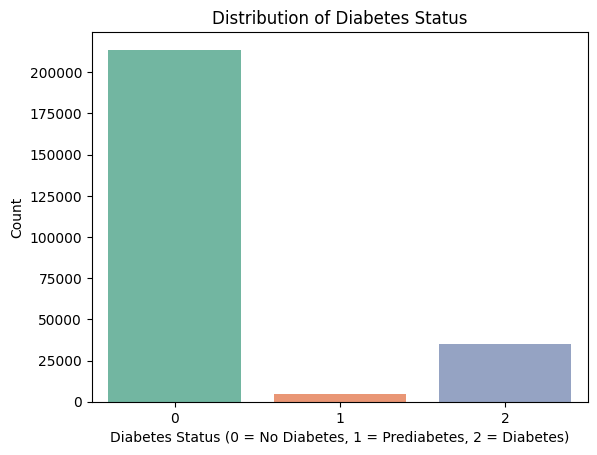

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot for diabetes status
sns.countplot(x='Diabetes_012', data=dataset, palette='Set2')
plt.title('Distribution of Diabetes Status')
plt.xlabel('Diabetes Status (0 = No Diabetes, 1 = Prediabetes, 2 = Diabetes)')
plt.ylabel('Count')
plt.show()


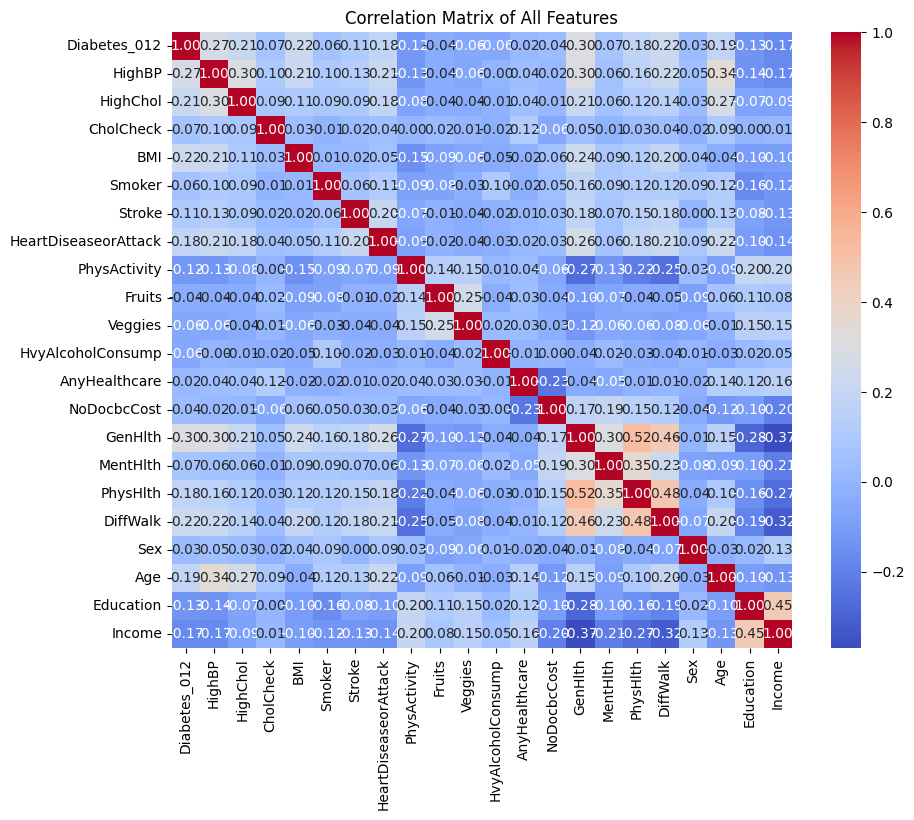


Correlation with Target Variable (Diabetes_012):
Diabetes_012            1.000000
GenHlth                 0.302587
HighBP                  0.271596
BMI                     0.224379
DiffWalk                0.224239
HighChol                0.209085
Age                     0.185026
HeartDiseaseorAttack    0.180272
PhysHlth                0.176287
Stroke                  0.107179
MentHlth                0.073507
CholCheck               0.067546
Smoker                  0.062914
NoDocbcCost             0.035436
Sex                     0.031040
AnyHealthcare           0.015410
Fruits                 -0.042192
HvyAlcoholConsump      -0.057882
Veggies                -0.058972
PhysActivity           -0.121947
Education              -0.130517
Income                 -0.171483
Name: Diabetes_012, dtype: float64

Selected Features based on Correlation:
['GenHlth', 'HighBP', 'BMI', 'DiffWalk', 'HighChol']


In [ ]:
# Calculate correlation matrix
correlation_matrix = dataset.corr()

# Visualize correlation with the target variable
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of All Features')
plt.show()

#Focus on correlation with the target variable
correlation_with_target = correlation_matrix['Diabetes_012'].sort_values(ascending=False)
print("\nCorrelation with Target Variable (Diabetes_012):")
print(correlation_with_target)

# Select highly correlated features (threshold 0.2)
correlation_threshold = 0.2
highly_correlated_features = correlation_with_target[correlation_with_target.abs() > correlation_threshold].index.tolist()
highly_correlated_features.remove('Diabetes_012')
print("\nSelected Features based on Correlation:")
print(highly_correlated_features)


## Step 1: Model Training Without Outlier Removal

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Define the features and target variable
X = dataset.drop(columns=['Diabetes_012'])
y = dataset['Diabetes_012']

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test-Validation Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Define simple models
models_without_outliers = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Naive Bayes': GaussianNB()
}

# Train and evaluate each model without outlier removal
results_without_outliers = {
    'Model': [],
    'Validation Accuracy': [],
    'Precision (Weighted)': [],
    'Recall (Weighted)': [],
    'F1 Score (Weighted)': []
}

for name, model in models_without_outliers.items():
    model.fit(X_train, y_train)
    val_pred = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, val_pred)
    precision = precision_score(y_val, val_pred, average='weighted')
    recall = recall_score(y_val, val_pred, average='weighted')
    f1 = f1_score(y_val, val_pred, average='weighted')

    results_without_outliers['Model'].append(name)
    results_without_outliers['Validation Accuracy'].append(val_accuracy)
    results_without_outliers['Precision (Weighted)'].append(precision)
    results_without_outliers['Recall (Weighted)'].append(recall)
    results_without_outliers['F1 Score (Weighted)'].append(f1)

    # Print classification report
    print(f"\nClassification Report (Validation Set - {name} Without Outlier Removal):")
    print(classification_report(y_val, val_pred))

results_df_without_outliers = pd.DataFrame(results_without_outliers)
print("\nValidation Results Without Outlier Removal:")
print(results_df_without_outliers)



Classification Report (Validation Set - Random Forest Without Outlier Removal):
              precision    recall  f1-score   support

           0       0.86      0.97      0.91     37247
           1       0.00      0.00      0.00       812
           2       0.50      0.19      0.27      6335

    accuracy                           0.84     44394
   macro avg       0.45      0.39      0.40     44394
weighted avg       0.79      0.84      0.80     44394


Classification Report (Validation Set - Decision Tree Without Outlier Removal):
              precision    recall  f1-score   support

           0       0.87      0.86      0.87     37247
           1       0.02      0.03      0.02       812
           2       0.30      0.31      0.31      6335

    accuracy                           0.77     44394
   macro avg       0.40      0.40      0.40     44394
weighted avg       0.77      0.77      0.77     44394


Classification Report (Validation Set - Naive Bayes Without Outlier Removal

##Step 2: Outlier Detection & Removal

In [ ]:
# Function to calculate outlier proportion for a feature
def calculate_outlier_proportion(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outlier_proportion = len(outliers) / len(df)
    return outlier_proportion

# Calculate outlier proportions for each feature
numerical_features = dataset.select_dtypes(include=[np.number]).columns.tolist()
outlier_proportions = {column: calculate_outlier_proportion(dataset, column) for column in numerical_features}

# Set a threshold (e.g., 10%) and select features with outlier proportion below the threshold
outlier_threshold = 0.10
selected_features = [feature for feature, proportion in outlier_proportions.items() if proportion < outlier_threshold]

# Display the outlier proportions
outlier_proportions_df = pd.DataFrame(list(outlier_proportions.items()), columns=['Feature', 'Outlier Proportion'])
print(outlier_proportions_df)

# Display the selected features after applying the threshold
print("\nSelected Features (Outlier Proportion < 10%):")
print(selected_features)


                 Feature  Outlier Proportion
0           Diabetes_012            0.157588
1                 HighBP            0.000000
2               HighChol            0.000000
3              CholCheck            0.037330
4                    BMI            0.038817
5                 Smoker            0.000000
6                 Stroke            0.040571
7   HeartDiseaseorAttack            0.094186
8           PhysActivity            0.243456
9                 Fruits            0.000000
10               Veggies            0.188580
11     HvyAlcoholConsump            0.056197
12         AnyHealthcare            0.048947
13           NoDocbcCost            0.084177
14               GenHlth            0.047623
15              MentHlth            0.142731
16              PhysHlth            0.161420
17              DiffWalk            0.168224
18                   Sex            0.000000
19                   Age            0.000000
20             Education            0.000000
21        

In [ ]:
# Filter the dataset to include only the selected features
X_filtered = dataset[selected_features]
y_filtered = dataset['Diabetes_012']

# Remove outliers from selected features
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

for column in selected_features:
    X_filtered = remove_outliers(X_filtered, column)

# Update the target variable to match the filtered features
y_filtered = dataset['Diabetes_012'].loc[X_filtered.index]

# Display the final dataset size and columns after outlier removal
print(f"\nDataset size after feature selection and outlier removal: {X_filtered.shape}")
print("\nColumns retained after feature selection and outlier removal:")
print(X_filtered.columns.tolist())



Dataset size after feature selection and outlier removal: (169555, 16)

Columns retained after feature selection and outlier removal:
['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'Fruits', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'Sex', 'Age', 'Education', 'Income']


## Step 3: Model Training After Outlier Removal

In [ ]:
# Scale the data after outlier removal
X_filtered_scaled = scaler.fit_transform(X_filtered)

# Train-Test-Validation Split
X_train_filtered, X_test_filtered, y_train_filtered, y_test_filtered = train_test_split(X_filtered_scaled, y_filtered, test_size=0.3, random_state=42)
X_train_filtered, X_val_filtered, y_train_filtered, y_val_filtered = train_test_split(X_train_filtered, y_train_filtered, test_size=0.25, random_state=42)

# Train and evaluate each model after outlier removal
results_with_outliers = {
    'Model': [],
    'Validation Accuracy': [],
    'Precision (Weighted)': [],
    'Recall (Weighted)': [],
    'F1 Score (Weighted)': []
}

for name, model in models_without_outliers.items():
    model.fit(X_train_filtered, y_train_filtered)

    val_pred_filtered = model.predict(X_val_filtered)
    val_accuracy_filtered = accuracy_score(y_val_filtered, val_pred_filtered)
    precision_filtered = precision_score(y_val_filtered, val_pred_filtered, average='weighted')
    recall_filtered = recall_score(y_val_filtered, val_pred_filtered, average='weighted')
    f1_filtered = f1_score(y_val_filtered, val_pred_filtered, average='weighted')

    results_with_outliers['Model'].append(name)
    results_with_outliers['Validation Accuracy'].append(val_accuracy_filtered)
    results_with_outliers['Precision (Weighted)'].append(precision_filtered)
    results_with_outliers['Recall (Weighted)'].append(recall_filtered)
    results_with_outliers['F1 Score (Weighted)'].append(f1_filtered)

    # Print classification report
    print(f"\nClassification Report (Validation Set - {name} After Outlier Removal):")
    print(classification_report(y_val_filtered, val_pred_filtered))

results_df_with_outliers = pd.DataFrame(results_with_outliers)
print("\nValidation Results With Outlier Removal:")
print(results_df_with_outliers)



Classification Report (Validation Set - Random Forest After Outlier Removal):
              precision    recall  f1-score   support

           0       0.89      0.96      0.92     25914
           1       0.01      0.00      0.00       478
           2       0.34      0.16      0.22      3280

    accuracy                           0.86     29672
   macro avg       0.41      0.37      0.38     29672
weighted avg       0.81      0.86      0.83     29672


Classification Report (Validation Set - Decision Tree After Outlier Removal):
              precision    recall  f1-score   support

           0       0.89      0.90      0.90     25914
           1       0.02      0.02      0.02       478
           2       0.24      0.22      0.23      3280

    accuracy                           0.81     29672
   macro avg       0.38      0.38      0.38     29672
weighted avg       0.81      0.81      0.81     29672


Classification Report (Validation Set - Naive Bayes After Outlier Removal):
   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:14

## Compare Validation Results

In [ ]:
# Combine the results into a single DataFrame for comparison
comparison_df = pd.concat([
    results_df_without_outliers.set_index('Model').add_suffix(' (Without Outlier Removal)'),
    results_df_with_outliers.set_index('Model').add_suffix(' (With Outlier Removal)')
], axis=1)

# Display the comparison
print("\nComparison of Validation Results:")
print(comparison_df)



Comparison of Validation Results:
               Validation Accuracy (Without Outlier Removal)  \
Model                                                          
Random Forest                                       0.839978   
Decision Tree                                       0.765554   
Naive Bayes                                         0.756791   

               Precision (Weighted) (Without Outlier Removal)  \
Model                                                           
Random Forest                                        0.792872   
Decision Tree                                        0.774670   
Naive Bayes                                          0.809661   

               Recall (Weighted) (Without Outlier Removal)  \
Model                                                        
Random Forest                                     0.839978   
Decision Tree                                     0.765554   
Naive Bayes                                       0.756791   

       

## Final Model Evaluation on Test Data

Random Forest Test Accuracy: 0.8544


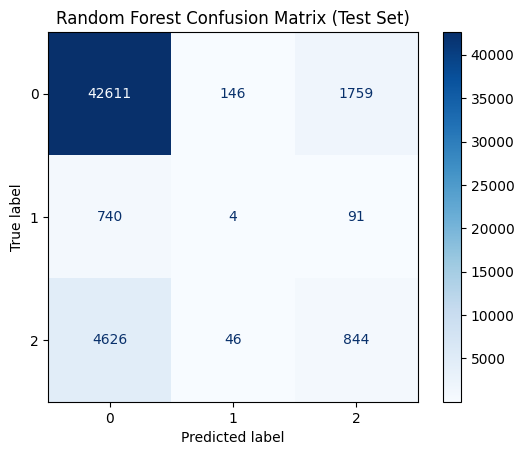

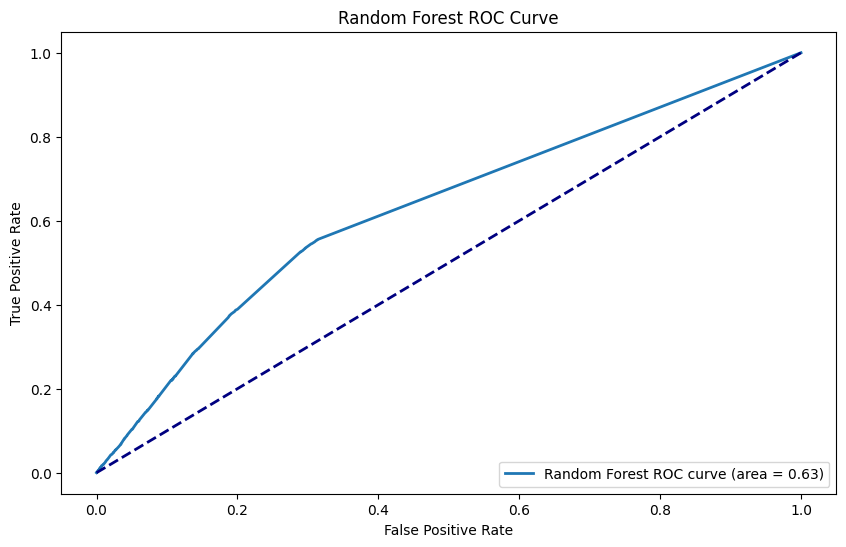

Decision Tree Test Accuracy: 0.8127


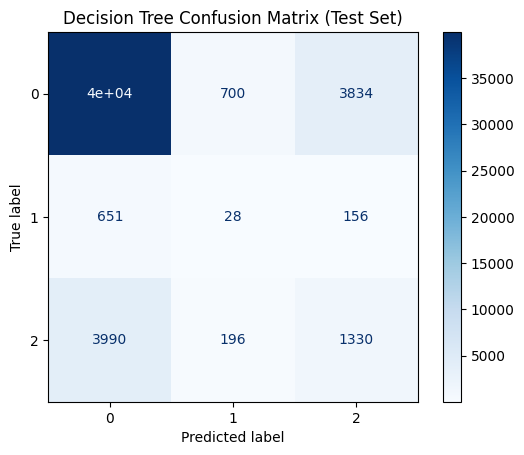

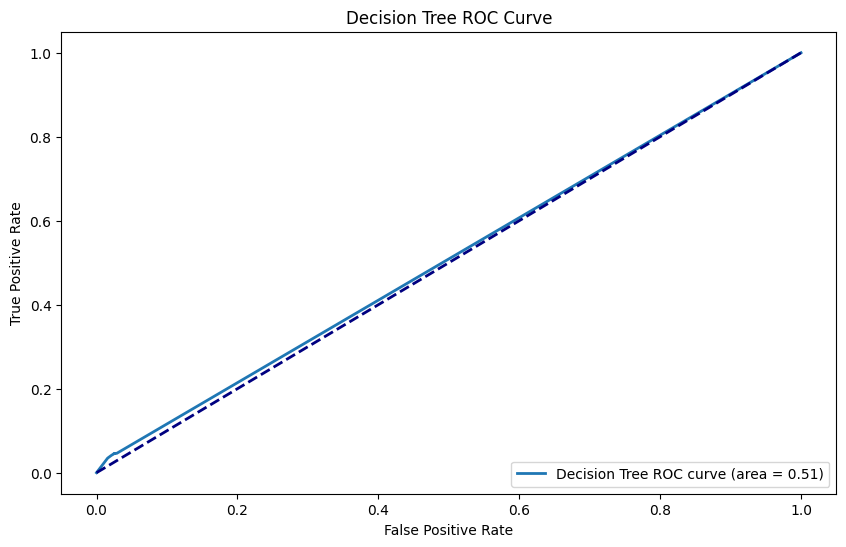

Naive Bayes Test Accuracy: 0.8410


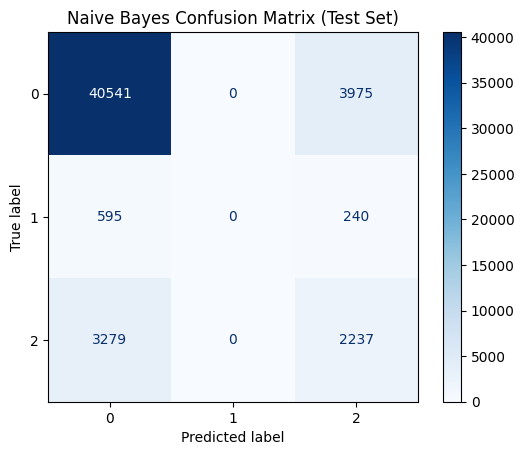

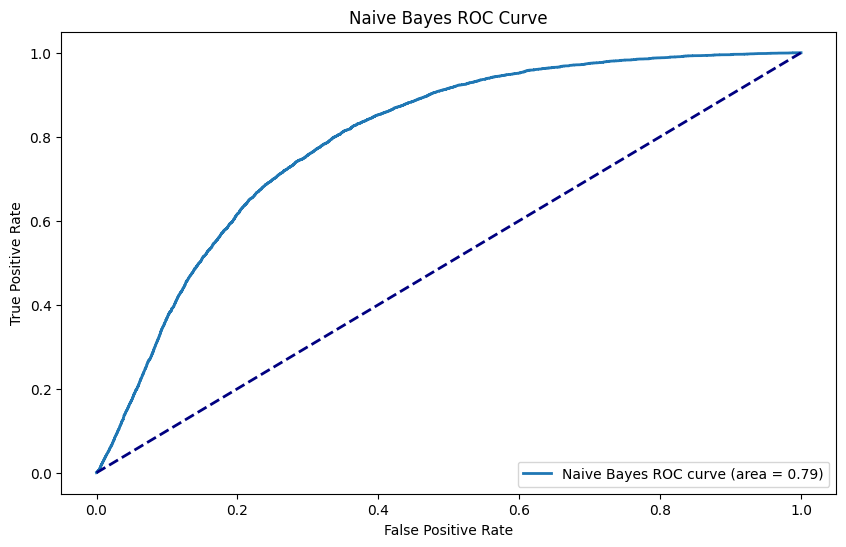

In [ ]:
# Evaluate the final models on the test set
for name, model in models_without_outliers.items():
    test_pred = model.predict(X_test_filtered)
    test_accuracy = accuracy_score(y_test_filtered, test_pred)
    print(f"{name} Test Accuracy: {test_accuracy:.4f}")

    # Generate confusion matrix
    conf_matrix = confusion_matrix(y_test_filtered, test_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"{name} Confusion Matrix (Test Set)")
    plt.show()

    # Generate ROC curve and AUC if applicable
    if hasattr(model, "predict_proba"):
        y_pred_prob = model.predict_proba(X_test_filtered)
        if y_pred_prob.shape[1] > 1:
            y_pred_prob = y_pred_prob[:, 1]  # Use the second column for binary classification
        else:
            y_pred_prob = y_pred_prob[:, 0]  # Use the only column available
        fpr, tpr, _ = roc_curve(y_test_filtered, y_pred_prob, pos_label=2)
        roc_auc = auc(fpr, tpr)

        plt.figure(figsize=(10, 6))
        plt.plot(fpr, tpr, lw=2, label=f'{name} ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{name} ROC Curve')
        plt.legend(loc="lower right")
        plt.show()



In [ ]:
# # Sample 10% of the data
# X_sampled = X_filtered.sample(frac=0.1, random_state=42)
# y_sampled = y_filtered.loc[X_sampled.index]

# # Pairplot on sampled data
# sns.pairplot(X_sampled.join(y_sampled), hue='Diabetes_012', diag_kind='kde')
# plt.suptitle('Pairplot of Selected Features vs. Diabetes Status', y=1.02)
# plt.show()
# # Select top 5 important features for pairplot
# top_features = selected_features[:5]
# sns.pairplot(X_filtered[top_features].join(y_filtered), hue='Diabetes_012', diag_kind='kde')
# plt.suptitle('Pairplot of Top Features vs. Diabetes Status', y=1.02)
# plt.show()


##  ROC Curves for Multiple Models

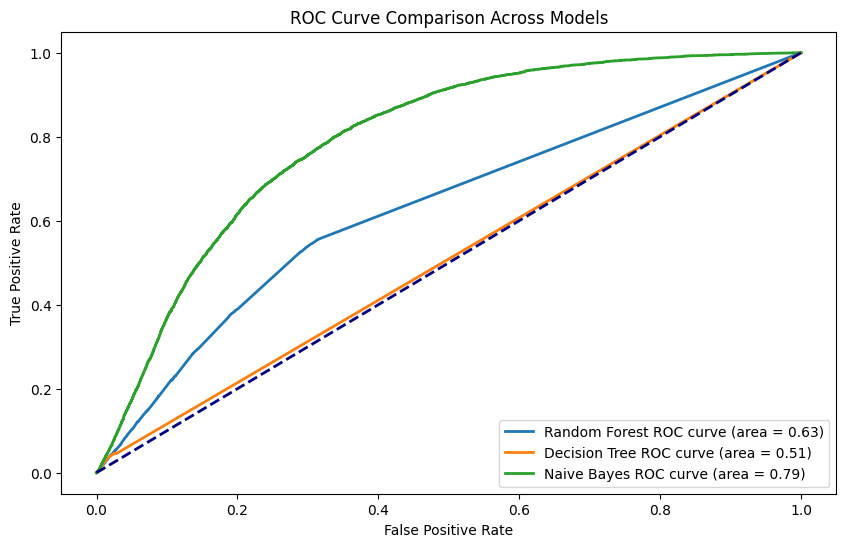

In [ ]:
# Overlay ROC curves for comparison
plt.figure(figsize=(10, 6))
for name, model in models_without_outliers.items():
    if hasattr(model, "predict_proba"):
        y_pred_prob = model.predict_proba(X_test_filtered)[:, 1]
        fpr, tpr, _ = roc_curve(y_test_filtered, y_pred_prob, pos_label=2)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'{name} ROC curve (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison Across Models')
plt.legend(loc="lower right")
plt.show()


Showing top 10 feature

In [ ]:
# Assuming X_filtered contains the features after outlier removal and y_filtered is the target
rf_model_filtered = RandomForestClassifier(random_state=42)
rf_model_filtered.fit(X_train_filtered, y_train_filtered)


RandomForestClassifier(random_state=42)

In [ ]:
# Get feature importances from the Random Forest model
importances_filtered = rf_model_filtered.feature_importances_
indices_filtered = np.argsort(importances_filtered)[::-1][:10]

# Select the top 10 features
top_10_features = [X_filtered.columns[i] for i in indices_filtered]
top_10_importances = importances_filtered[indices_filtered]


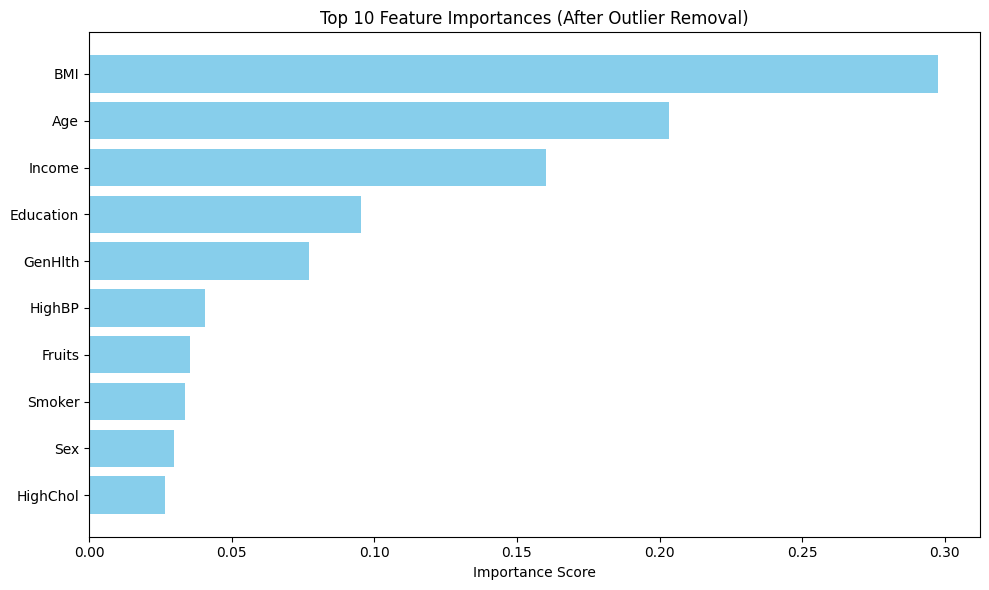

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(top_10_features[::-1], top_10_importances[::-1], color='skyblue')
plt.title("Top 10 Feature Importances (After Outlier Removal)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


## Age Distribution by Diabetes Status

In [ ]:
# Define the age mapping
age_mapping = {
    1: '18-24',
    2: '25-29',
    3: '30-34',
    4: '35-39',
    5: '40-44',
    6: '45-49',
    7: '50-54',
    8: '55-59',
    9: '60-64',
    10: '65-69',
    11: '70-74',
    12: '75-79',
    13: '80 or older'
}

# Apply the mapping to the Age column
dataset['Age_Group'] = dataset['Age'].map(age_mapping)

# Display the first few rows to verify the mapping
dataset[['Age', 'Age_Group']].head()
# Group by 'Age_Group' and 'Diabetes_012'
age_diabetes = dataset.groupby(['Age_Group', 'Diabetes_012']).size().unstack().fillna(0)




<Figure size 1200x800 with 0 Axes>

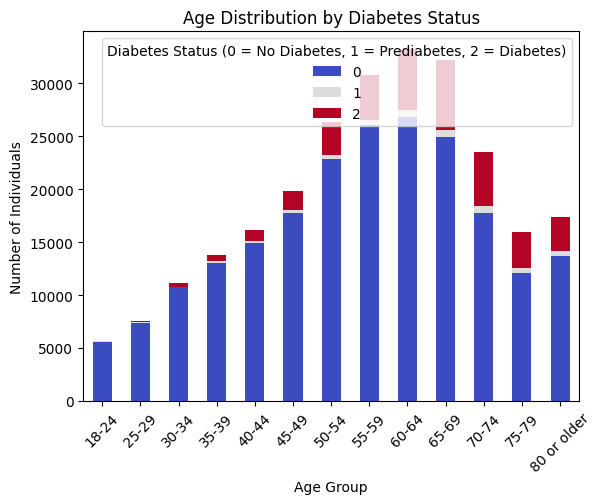

In [ ]:
# Ensure that the data is in numeric format
age_diabetes = dataset.groupby(['Age_Group', 'Diabetes_012']).size().unstack().fillna(0).astype(int)

# Plotting the distribution of diabetes across age categories
plt.figure(figsize=(12, 8))
age_diabetes.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Age Distribution by Diabetes Status')
plt.xlabel('Age Group')
plt.ylabel('Number of Individuals')
plt.legend(title='Diabetes Status (0 = No Diabetes, 1 = Prediabetes, 2 = Diabetes)')
plt.xticks(rotation=45)
plt.show()
